In [1]:
import matplotlib.pyplot as plt
import numpy as np

from subjects.constants import NIMBLE_BODY_NODES_UIP, NIMBLE_BODY_NODES_DIP
from subjects.uip_subject import UIPSubject
from subjects.dip_imu_subject import DIPSubject

GEOMETRY_PATH = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/Geometry/"
trial_path_uip = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/S0.b3d"
trial_path_dip = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/DIP/S1.b3d"

In [2]:
subject = UIPSubject(trial_path_uip, GEOMETRY_PATH, NIMBLE_BODY_NODES_UIP)

Setting len to 0.088927
Setting neutral pos to   0
0.7
  0
Setting len to 0.329597
Setting neutral pos to    0
-0.6
   0
Setting len to 0.111008
Setting neutral pos to   0
0.2
  0
<_io.BufferedReader name='/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/sensors/S0/0.pkl'>
<_io.BufferedReader name='/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/sensors/S0/1.pkl'>
<_io.BufferedReader name='/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/sensors/S0/2.pkl'>
<_io.BufferedReader name='/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/sensors/S0/3.pkl'>
<_io.BufferedReader name='/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/sensors/S0/4.pkl'>


In [3]:
synthetic_accelerations = subject.syn_imu["3"]["acc"]
real_accelerations = subject.trial_imu_map["3"]["acc"]

In [4]:
synthetic_accelerations.shape

(16974, 6, 3)

In [5]:
real_accelerations.shape

(16974, 6, 3)

In [6]:
np.mean(synthetic_accelerations - real_accelerations)

1.711936534340043

In [7]:
subject.generate_nimble_visualization("3")

GUIWebsocketServer will start serving a WebSocket server on ws://localhost:8070
Web GUI serving on http://localhost:58143


 20%|█▉        | 3316/16974 [01:03<04:17, 52.96it/s]Connection closed.
There are now 1 open connections.
100%|██████████| 16974/16974 [05:22<00:00, 52.60it/s]


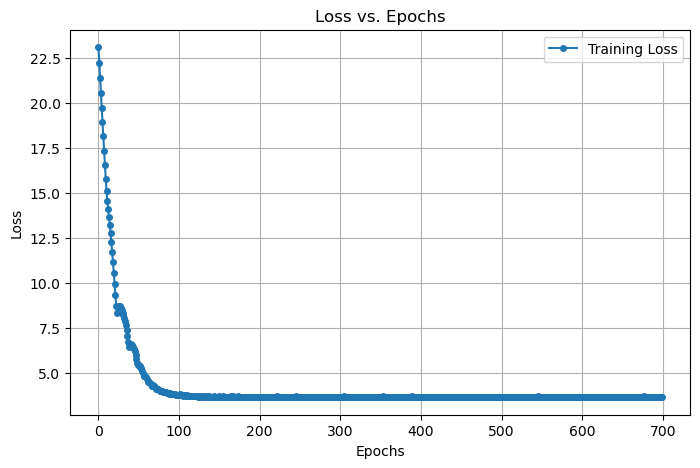

In [8]:
losses = subject.opt_trans["3"]["losses"]

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(losses)), losses, label="Training Loss", marker="o", linestyle="-", markersize=4)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()